# Prediction on the final Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df.drop(["Company","Region"], axis = 1, inplace = True)
df.rename({"Value":"CompanySpend", "Spendings":"TotalSpend"}, axis=1, inplace=True)
df= pd.get_dummies(df, columns=["Device", "Market", "SubMarket"], drop_first=True)
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
df

KeyError: "['Region'] not found in axis"

In [32]:
X_train = df[(df.Year<=2022)]
X_test = df[(df.Year>=2023)]
y_train = X_train.pop("CompanySpend")
y_test = X_test.pop("CompanySpend")
X_train.drop(["Year"], axis=1, inplace=True)
X_test.drop(["Year"], axis=1, inplace=True)

/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2512413128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(["Year"], axis=1, inplace=True)
/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2512413128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(["Year"], axis=1, inplace=True)


### Linear Regression

In [49]:
X_bis = sm.add_constant(np.asarray(X_train).astype('float64'))
est = sm.OLS(np.asarray(y_train).astype('float64'), X_bis)
reg = est.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     81.08
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:23:03   Log-Likelihood:            -1.0365e+05
No. Observations:               17768   AIC:                         2.074e+05
Df Residuals:                   17718   BIC:                         2.078e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2323      2.980     -0.749      0.4

### CART

In [22]:
model_cart = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)
model_cart.fit(X_train, y_train)
r2_score(y_train, model_cart.predict(X_train))

0.8263664074287167

In [23]:
r2_score(y_test, model_cart.predict(X_test))

0.4620109698256417

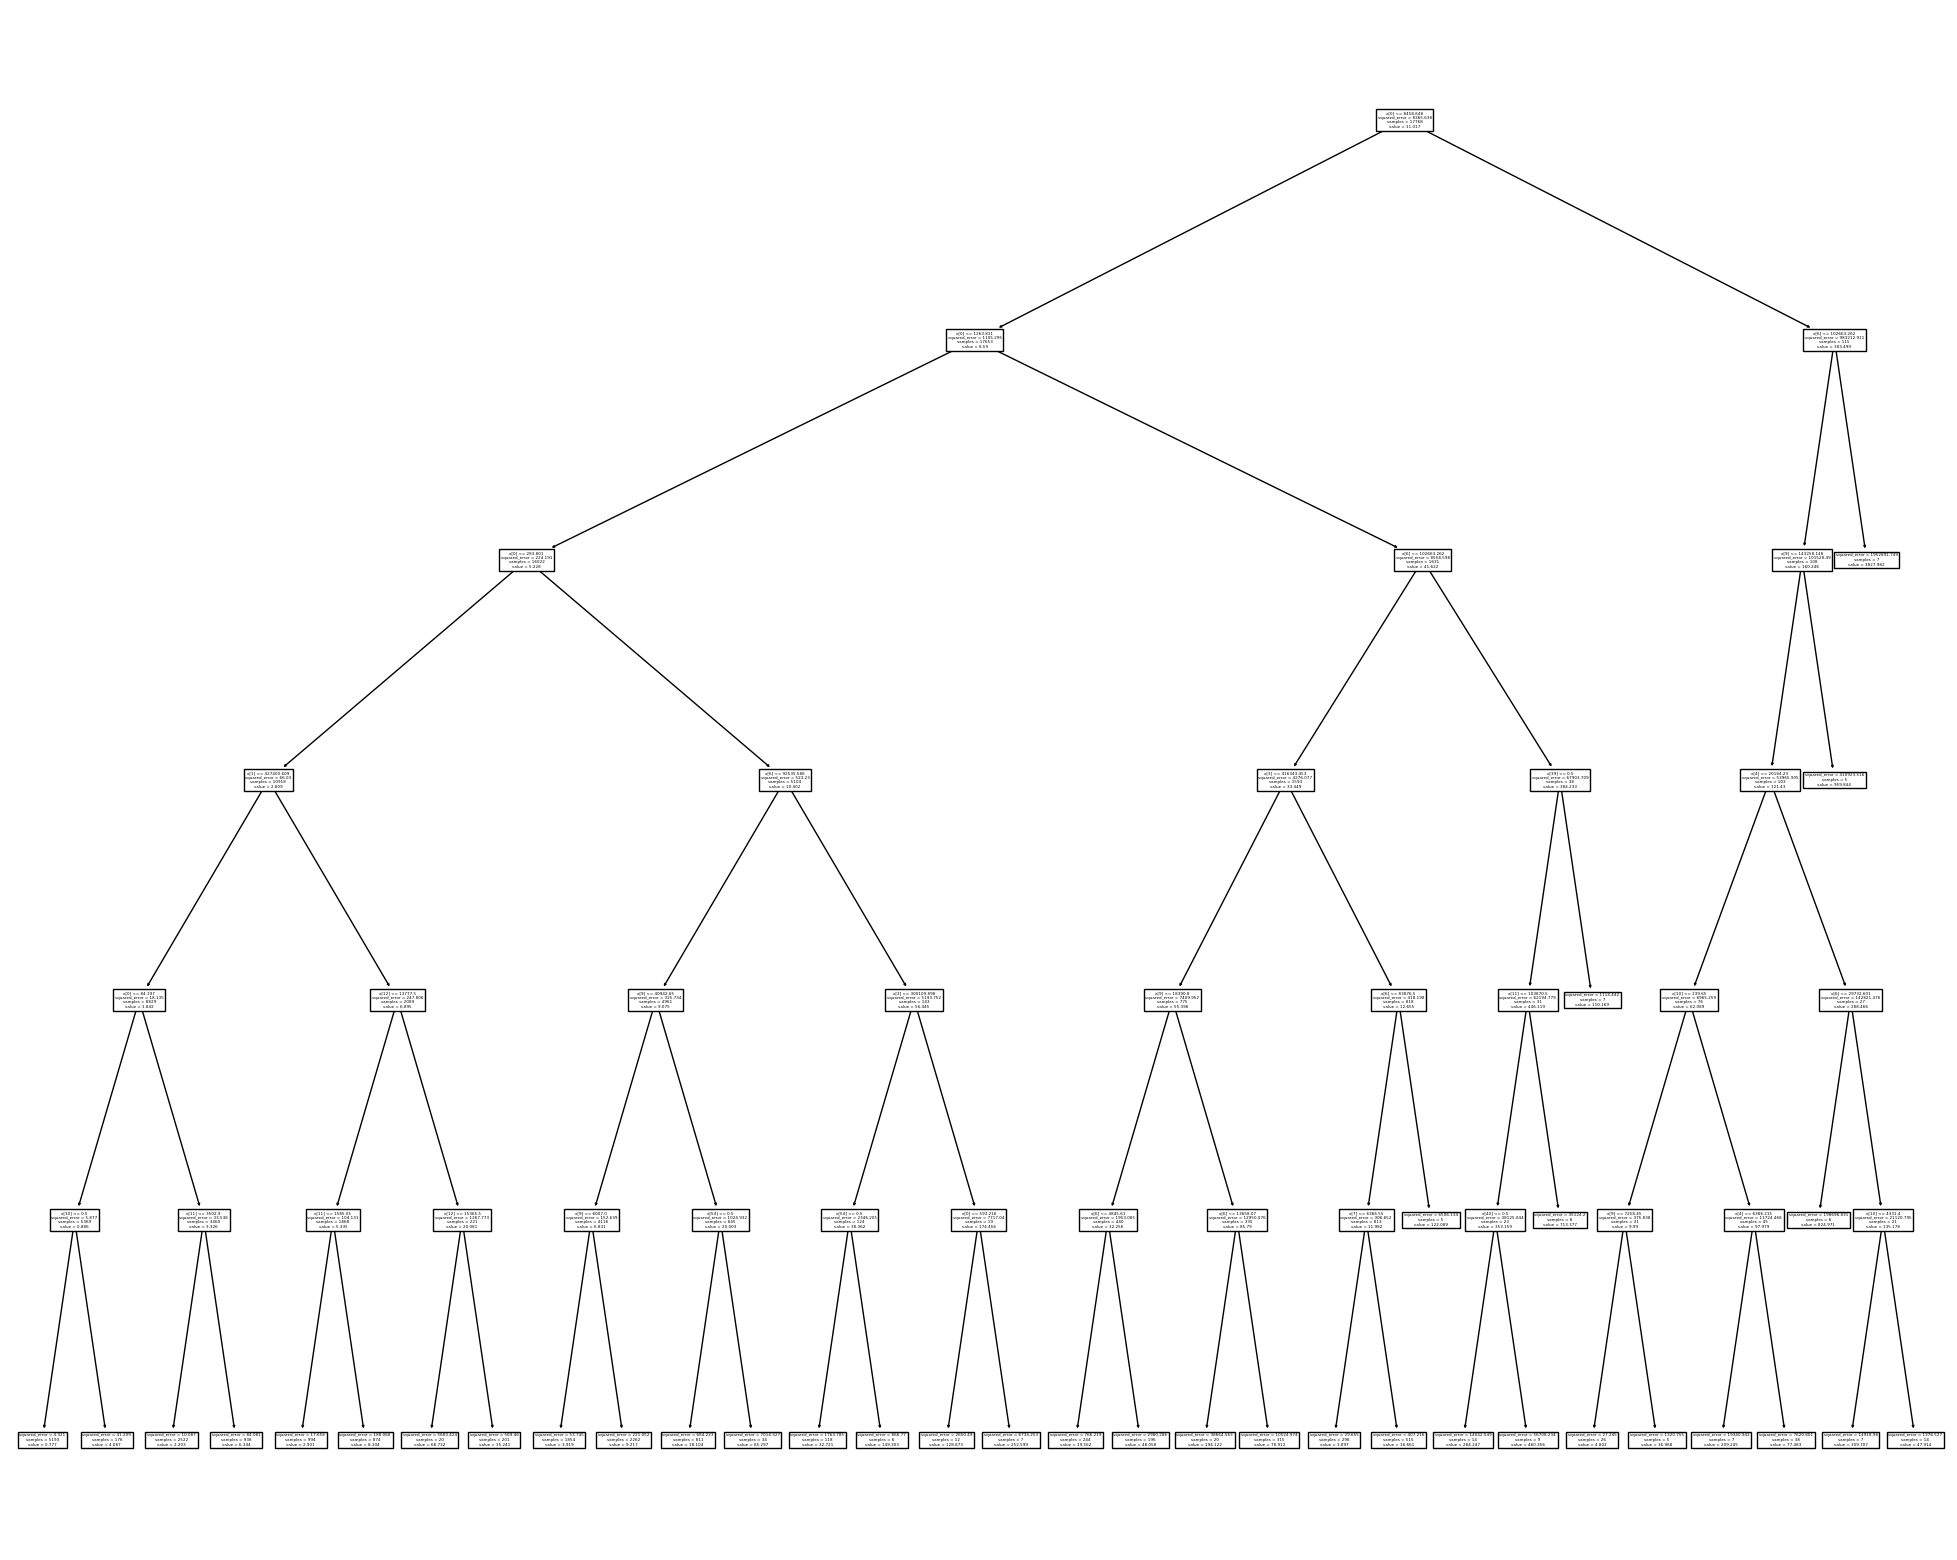

In [27]:
fig = plt.figure(figsize=(25,20))
plot_tree(model_cart)
plt.show()

### Features Analysis

In [13]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df.drop("Company", axis =1, inplace = True)
df.head(10)

,Device,Market,SubMarket,Year,Value,Spendings,MarketSpends,SubMarketSpends,DevSpends,Cogs,Cogs_1,Cogs_2,Revenue,Revenue_1,Revenue_2,Ebitda,Ebitda_1,Ebitda_2
0,Amplifier/Comparator,Industrial,Power & Energy,2018,7.466000,200.530,11486.855,2038.700,3990.996,19059.000000,17278.000000,17270.0,27662.00,25196.00,24929.0,3227.00,2929.00,2987.0
1,Amplifier/Comparator,Industrial,Power & Energy,2019,8.471900,189.490,10750.418,1947.505,3800.001,19018.000000,19059.000000,17278.0,27978.00,27662.00,25196.0,3347.00,3227.00,2929.0
2,Amplifier/Comparator,Industrial,Power & Energy,2020,8.661150,195.081,10966.167,2004.751,3786.004,18123.000000,19018.000000,19059.0,26134.00,27978.00,27662.0,2668.00,3347.00,3227.0
3,Amplifier/Comparator,Industrial,Power & Energy,2021,10.090255,240.245,13599.835,2321.554,4785.001,19407.000000,18123.000000,19018.0,28945.00,26134.00,27978.0,4641.00,2668.00,3347.0
4,Amplifier/Comparator,Industrial,Power & Energy,2022,10.040442,257.635,15244.412,2525.705,5469.003,19712.000000,19407.000000,18123.0,29446.00,28945.00,26134.0,4477.00,4641.00,2668.0
5,Amplifier/Comparator,Industrial,Power & Energy,2023,10.927740,291.701,16317.564,2875.164,5133.007,9879.678571,19712.000000,19407.0,32174.52,29446.00,28945.0,5807.68,4477.00,4641.0
6,Amplifier/Comparator,Industrial,Power & Energy,2024,11.659800,322.803,17578.984,3481.204,5225.000,10122.197857,9879.678571,19712.0,32970.35,32174.52,29446.0,5943.65,5807.68,4477.0
7,Analog Application Specific IC,Industrial,Power & Energy,2018,19.892055,537.084,11486.855,2038.700,39283.995,19059.000000,17278.000000,17270.0,27662.00,25196.00,24929.0,3227.00,2929.00,2987.0
8,Analog Application Specific IC,Industrial,Power & Energy,2019,23.233800,516.907,10750.418,1947.505,36867.003,19018.000000,19059.000000,17278.0,27978.00,27662.00,25196.0,3347.00,3227.00,2929.0
9,Analog Application Specific IC,Industrial,Power & Energy,2020,23.004358,525.744,10966.167,2004.751,40487.011,18123.000000,19018.000000,19059.0,26134.00,27978.00,27662.0,2668.00,3347.00,3227.0


In [16]:
new_df = pd.read_csv("../clean_data/newtarget_df.csv", index_col= 0)
new_df.drop("Company", axis =1, inplace = True)
new_df.head(10)

,Device,Market,SubMarket,Year,Target,LogDiffSpendings,LogDiffMarketSpends,LogDiffSubMarketSpends,LogDiffDevSpends,LogDiffCogs,LogDiffRevenue,LogDiffEbitda,LogDiffCogs_1,LogDiffRevenue_1,LogDiffEbitda_1
0,Amplifier/Comparator,Industrial,Power & Energy,2019,0.112271,-0.056339,-0.066253,-0.045740,-0.049027,-0.002153,0.011358,0.036500,0.098100,0.093371,0.096860
1,Amplifier/Comparator,Industrial,Power & Energy,2020,0.019783,0.028928,0.019868,0.028956,-0.003689,-0.048201,-0.068179,-0.226659,-0.002153,0.011358,0.036500
2,Amplifier/Comparator,Industrial,Power & Energy,2021,0.137954,0.207285,0.215225,0.146649,0.234120,0.068448,0.102157,0.553441,-0.048201,-0.068179,-0.226659
3,Amplifier/Comparator,Industrial,Power & Energy,2022,-0.004502,0.069605,0.114147,0.084249,0.133584,0.015593,0.017160,-0.035969,0.068448,0.102157,0.553441
4,Amplifier/Comparator,Industrial,Power & Energy,2023,0.077302,0.123734,0.068025,0.129541,-0.063393,-0.690697,0.088614,0.260177,0.015593,0.017160,-0.035969
5,Amplifier/Comparator,Industrial,Power & Energy,2024,0.059565,0.100984,0.074458,0.191208,0.017760,0.024248,0.024433,0.023138,-0.690697,0.088614,0.260177
6,Analog Application Specific IC,Industrial,Power & Energy,2019,0.148379,-0.038219,-0.066253,-0.045740,-0.063499,-0.002153,0.011358,0.036500,0.098100,0.093371,0.096860
7,Analog Application Specific IC,Industrial,Power & Energy,2020,-0.009513,0.016919,0.019868,0.028956,0.093662,-0.048201,-0.068179,-0.226659,-0.002153,0.011358,0.036500
8,Analog Application Specific IC,Industrial,Power & Energy,2021,0.148704,0.096136,0.215225,0.146649,0.241003,0.068448,0.102157,0.553441,-0.048201,-0.068179,-0.226659
9,Analog Application Specific IC,Industrial,Power & Energy,2022,0.079354,0.110190,0.114147,0.084249,0.125221,0.015593,0.017160,-0.035969,0.068448,0.102157,0.553441


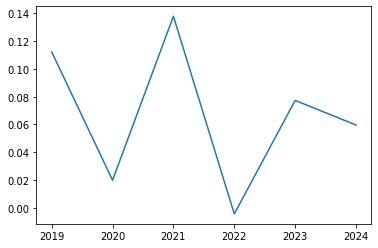

In [18]:
plt.plot(list(new_df.Year)[:6], list(new_df.Target)[:6])

<AxesSubplot:>

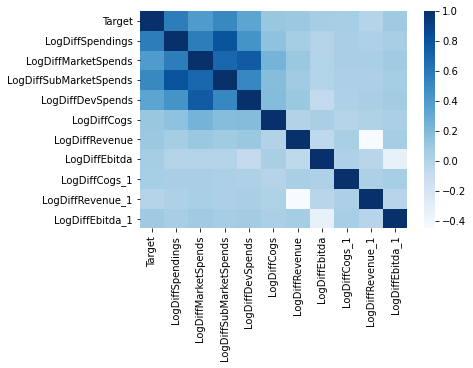

In [17]:
import seaborn as sn
corr_df = new_df.iloc[:, 4:]
sn.heatmap(corr_df.corr(), cmap="Blues")

### XGBoost

In [5]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [129]:
features = [x for x in list(df.columns) if not (x.endswith("1") or x.endswith("2"))]
features = ['Device',
 'Market',
 'SubMarket',
 'Year',
 'Value',
 'Spendings',
 'DevSpends',
 'MarketSpends',
 'SubMarketSpends',
 'Cogs',
 'Revenue',
 'Ebitda']

In [6]:
first_df = df[(df.Year <= 2022)]
y_train = np.array(first_df.Value)
X_train = first_df.drop("Value", axis = 1)
second_df = df[(df.Year >= 2023)]
y_test = np.array(second_df.Value)
X_test = second_df.drop("Value", axis = 1)


In [ ]:
cat = ["Device", "Market", "SubMarket"]
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat)], remainder='passthrough')
encoder = full_pipeline.fit(X_train)

In [136]:
X_train

,Device,Market,SubMarket,Year,Spendings,MarketSpends,SubMarketSpends,DevSpends,Cogs,Cogs_1,Cogs_2,Revenue,Revenue_1,Revenue_2,Ebitda,Ebitda_1,Ebitda_2
0,Amplifier/Comparator,Industrial,Power & Energy,2018,200.530,11486.855,2038.700,3990.996,19059.00,17278.00,17270.00,27662.0,25196.0,24929.0,3227.0,2929.0,2987.0
1,Amplifier/Comparator,Industrial,Power & Energy,2019,189.490,10750.418,1947.505,3800.001,19018.00,19059.00,17278.00,27978.0,27662.0,25196.0,3347.0,3227.0,2929.0
2,Amplifier/Comparator,Industrial,Power & Energy,2020,195.081,10966.167,2004.751,3786.004,18123.00,19018.00,19059.00,26134.0,27978.0,27662.0,2668.0,3347.0,3227.0
3,Amplifier/Comparator,Industrial,Power & Energy,2021,240.245,13599.835,2321.554,4785.001,19407.00,18123.00,19018.00,28945.0,26134.0,27978.0,4641.0,2668.0,3347.0
4,Amplifier/Comparator,Industrial,Power & Energy,2022,257.635,15244.412,2525.705,5469.003,19712.00,19407.00,18123.00,29446.0,28945.0,26134.0,4477.0,4641.0,2668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,Voltage Regulator/Reference,Consumer,Appliance,2018,209.215,5264.952,441.264,10820.000,518.61,438.11,337.83,1092.6,883.9,660.6,144.8,96.7,70.8
25931,Voltage Regulator/Reference,Consumer,Appliance,2019,260.260,5174.397,511.580,10981.006,658.36,518.61,438.11,1214.0,1092.6,883.9,124.5,144.8,96.7
25932,Voltage Regulator/Reference,Consumer,Appliance,2020,282.999,5679.186,558.000,11956.010,758.24,658.36,518.61,1430.4,1214.0,1092.6,184.4,124.5,144.8
25933,Voltage Regulator/Reference,Consumer,Appliance,2021,399.001,7289.565,722.000,15765.008,1013.47,758.24,658.36,1565.0,1430.4,1214.0,43.4,184.4,124.5


In [ ]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[20, 30, 40, 50, 60]
max_depth = [3, 4, 5]
alpha = [0.5, 0.7, 1, 1.5]
lam = [0.5, 0.7, 1, 1.5]


init_lr = 0.3
def lr_decay(epoch):
    lr = init_lr*0.9**epoch   # *0.99 0.9 0.995 0.999
    return lr

lrs = xgboost.callback.LearningRateScheduler(lr_decay)

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                res = [num_esti, md, a, l]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l, eta = 0.3)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

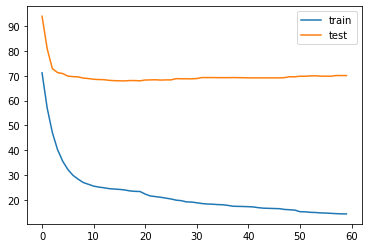

R2 score of the train set : 0.9743109407667973
R2 score of the train set : 0.47847854427022485
OSR2 : 0.6312014700416564


In [7]:
#score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda","rmse"])
#score.sort_values(by=['rmse'], ascending=False, inplace = True)
#best_params = list(score.iloc[0, :])[:-1]
#print(score.iloc[0, :])

evalset = [(encoder.transform(X_train), y_train), (encoder.transform(X_test),y_test)]
model = XGBRegressor(n_estimators = 60, max_depth = 4, reg_alpha = 0.7, reg_lambda = 0.5, eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(encoder.transform(X_train), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_train)), y_train)}")
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_test)), y_test)}")

osr = 1 - (sum([(list(model.predict(encoder.transform(X_test)))[k] - y_test[k])**2 for k in range(len(y_test))]))/(sum([(np.mean(y_train) - y_test[k])**2 for k in range(len(y_test))]))
print(f"OSR2 : {osr}")

In [ ]:
def osr2(x, y, train):
    return 1 - (sum([(list(x)[k] - list(y)[k])**2 for k in range(len(y))]))/(sum([(np.mean(train) - list(y)[k])**2 for k in range(len(y))]))

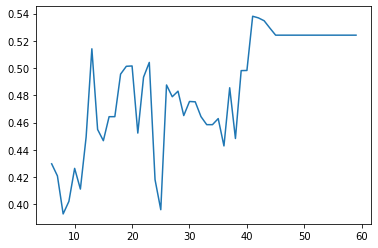

In [23]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(model.feature_importances_)
score_r2 = []
nb_features = []
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(encoder.transform(X_train))
	# train model
	selection_model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(encoder.transform(X_test))
	r2 = r2_score(selection_model.predict(select_X_test), y_test)
	score_r2.append(r2)
	nb_features.append(select_X_train.shape[1])
	#print("Thresh=%.3f, n=%d, R2: %.4f" % (thresh, select_X_train.shape[1], r2))
plt.plot(nb_features[:-5], score_r2[:-5])
plt.show()

### RF

In [76]:
from sklearn.ensemble import RandomForestRegressor
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[30, 50, 60, 70, 100, 120, 150]
min_samples_split = [2, 3, 5, 7]
min_samples_leaf = [1, 3, 5]
max_features = ["sqrt", "log2", 1]


score = []
for num_esti in num_estimators:
    for mss in min_samples_split:
        for msl in min_samples_leaf:
            for mf in max_features:
                res = [num_esti, mss, msl, mf]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = RandomForestRegressor(n_estimators = num_esti, min_samples_split = mss, min_samples_leaf = msl, max_features = mf)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

In [71]:
#score = pd.DataFrame(score, columns = ["num_estimators", "min_samples_split", "min_samples_leaf", "max_features","rmse"])
#score.sort_values(by=['rmse'], ascending=False, inplace = True)
#best_params = list(score.iloc[0, :])[:-1]
#print(score.iloc[0, :])
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 70, min_samples_split = 7, min_samples_leaf = 1, max_features = 1)
model.fit(encoder.transform(X_train), y_train)# , callbacks=[callbacks])
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_train)), y_train)}")
print(f"R2 score of the test set : {r2_score(model.predict(encoder.transform(X_test)), y_test)}")
print(f"OSR2 : {osr2(model.predict(encoder.transform(X_test)), y_test, y_train)}")

R2 score of the train set : 0.10807858499709522
R2 score of the test set : -1.401407192195954
OSR2 : 0.5002198879842832


### PCA + Models

In [6]:
from sklearn.decomposition import PCA, TruncatedSVD

Elbow criteria

In [10]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[50]
max_depth = [5]
alpha = [1.5]
lam = [1.5]
nb_components = [i for i in range(5, 15)]

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                for nb_compo in nb_components :
                    res = [num_esti, md, a, l, nb_compo]
                    rmse = []
                    for train_index, test_index in tscv.split(X_train):
                        cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                        cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                        #init_lr = eta
                        pca = TruncatedSVD(n_components = nb_compo)
                        train_pca = pca.fit_transform(cv_train)
                        #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                        model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l)
                        model.fit(train_pca, cv_y_train) #, callbacks=[callbacks])
                        rmse.append(np.sqrt(mean_squared_error(model.predict(pca.transform(cv_val)), cv_y_val)))
                    res.append(np.mean(rmse))
                    score.append(res)

num_estimators    50.00000
max_depth          5.00000
alpha              1.50000
lambda             1.50000
nb_components     11.00000
rmse              58.53721
Name: 6, dtype: float64


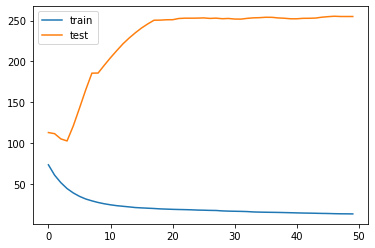

R2 score of the train set : 0.9767787905039392
R2 score of the test set : -0.01863499345159414


In [14]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "nb_components", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

pca = TruncatedSVD(n_components = nb_compo)
pca.fit(encoder.transform(X_train))
evalset = [(pca.transform(encoder.transform(X_train)), y_train), (pca.transform(encoder.transform(X_test)),y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(pca.transform(encoder.transform(X_train)), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(pca.transform(encoder.transform(X_train))), y_train)}")
print(f"R2 score of the test set : {r2_score(model.predict(pca.transform(encoder.transform(X_test))), y_test)}")

Kaiser Criteria

In [18]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[30, 40, 50, 60]
max_depth = [3, 4, 5]
alpha = [0.7, 1, 1.5]
lam = [0.7, 1, 1.5]

pca = TruncatedSVD()
pca.fit(encoder.transform(X_train))
eigenvalues = pca.explained_variance_
nb_components = np.sum(eigenvalues > 1.0)

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                res = [num_esti, md, a, l]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    pca = TruncatedSVD(n_components = nb_components)
                    train_pca = pca.fit_transform(cv_train)
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l, eta = 0.3)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

num_estimators    50.000000
max_depth          4.000000
alpha              1.500000
lambda             0.700000
rmse              56.220991
Name: 69, dtype: float64


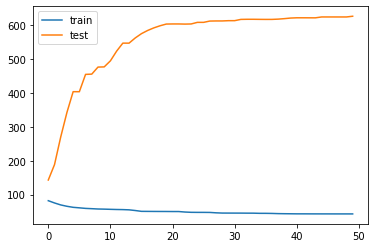

R2 score of the train set : 0.6906190922286009
R2 score of the test set : -0.05419151690776847


In [20]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

pca = TruncatedSVD(n_components = nb_components)
pca.fit(encoder.transform(X_train))
evalset = [(pca.transform(encoder.transform(X_train)), y_train), (pca.transform(encoder.transform(X_test)),y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(pca.transform(encoder.transform(X_train)), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(pca.transform(encoder.transform(X_train))), y_train)}")
print(f"R2 score of the test set : {r2_score(model.predict(pca.transform(encoder.transform(X_test))), y_test)}")

### Baseline

In [55]:
baseline_df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
baseline_train = baseline_df[["Company", "Market", "SubMarket", "Device", "Year", "Spendings"]][(baseline_df.Year <= 2022)]
baseline_test = baseline_df[["Company", "Market", "SubMarket", "Device", "Year", "Spendings"]][(baseline_df.Year >= 2023)]

In [56]:
combinations = []
for ind in baseline_train.groupby(["Company", "Market", "SubMarket", "Device"]).size().reset_index().index:
    combinations.append(baseline_train.groupby(["Company", "Market", "SubMarket", "Device"]).size().reset_index().iloc[0, :-1].values)

In [66]:
r2_baseline_train = []
r2_baseline_test = []
osr2_baseline = []
for x in combinations :
    y_train = baseline_train[(baseline_train.Company == x[0]) & (baseline_train.Market == x[1]) & (baseline_train.SubMarket == x[2]) & (baseline_train.Device == x[3])].Spendings
    X_train = np.array([i for i in range(2018, 2023)]).reshape(-1, 1)
    X_bis = sm.add_constant(X_train)
    est = sm.OLS(y_train, X_bis)
    reg = est.fit()
    X_test = np.array([2023, 2024]).reshape(-1, 1)
    X_test_bis = sm.add_constant(X_test)
    y_test = baseline_test[(baseline_test.Company == x[0]) & (baseline_test.Market == x[1]) & (baseline_test.SubMarket == x[2]) & (baseline_test.Device == x[3])].Spendings
    r2_baseline_train.append(r2_score(reg.predict(X_bis), y_train))
    r2_baseline_test.append(r2_score(reg.predict(X_test_bis), y_test))
    osr2_baseline.append(osr2(reg.predict(X_test_bis), y_test, y_train))

print(f"The Train R2 for the baseline is : {np.mean(r2_baseline_train)}")
print(f"The Test R2 for the baseline is : {np.mean(r2_baseline_test)}")
print(f"The OR2 for the baseline is : {np.mean(osr2_baseline)}")

The Train R2 for the baseline is : 0.6406643140498136
The Test R2 for the baseline is : -15.71126773254403
The OR2 for the baseline is : 0.8656162143161908


In [25]:
y_test

5    291.701
6    322.803
Name: Spendings, dtype: float64

### Other Baseline

In [33]:
baseline_df2 = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
baseline_df2["Predict"] = baseline_df2.Spendings.shift(1)
baseline_df2 = baseline_df2[(baseline_df2.Year >= 2023)][["Spendings", "Predict"]]
r2_baseline_test2 = []
osr2_baseline2 = []
k = 0
for i, ind in enumerate(list(baseline_df2.index)):
    if k //2 == 0:
        print(i)
        r2_baseline_test2.append(r2_score(baseline_df2.iloc[i:i+2, :].Spendings, baseline_df2.iloc[i:i+2, :].Predict))
        osr2
    k += 1
print(f"The Test R2 for the baseline is : {np.mean(r2_baseline_test2)}")

0
1
The Test R2 for the baseline is : -1.2523417254105749


### New XGBoost

In [21]:
first_df = new_df[(new_df.Year <= 2022)]
y_train = np.array(first_df.Target)
X_train = first_df.drop(["Target", "Year"], axis = 1)
second_df = new_df[(new_df.Year >= 2023)]
y_test = np.array(second_df.Target)
X_test = second_df.drop(["Target", "Year"], axis = 1)

In [22]:
cat = ["Device", "Market", "SubMarket"]
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat)], remainder='passthrough')
encoder = full_pipeline.fit(X_train)

In [24]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[30, 50, 75, 100]
max_depth = [3, 4, 5]
alpha = [0.5, 0.7, 1, 1.5]
lam = [0.5, 0.7, 1, 1.5]


init_lr = 0.3
def lr_decay(epoch):
    lr = init_lr*0.9**epoch   # *0.99 0.9 0.995 0.999
    return lr

lrs = xgboost.callback.LearningRateScheduler(lr_decay)

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                res = [num_esti, md, a, l]
                rmse = []
                for train_index, test_index in tscv.split(X_train):
                    cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                    cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                    #init_lr = eta
                    #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                    model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l, eta = 0.3)
                    model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                    rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                res.append(np.mean(rmse))
                score.append(res)

num_estimators    75.000000
max_depth          5.000000
alpha              0.500000
lambda             0.700000
rmse               0.150497
Name: 129, dtype: float64


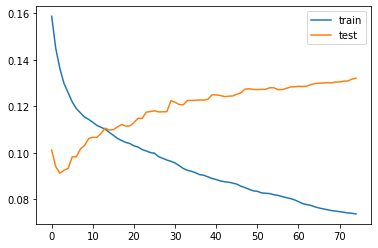

R2 score of the train set : 0.7576130198814338
R2 score of the train set : -0.037847710994001416
OSR2 : -0.21654478359557205


In [29]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda","rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

evalset = [(encoder.transform(X_train), y_train), (encoder.transform(X_test),y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], eta = 0.3)
#init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(encoder.transform(X_train), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_train)), y_train)}")
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_test)), y_test)}")

osr = 1 - (sum([(list(model.predict(encoder.transform(X_test)))[k] - y_test[k])**2 for k in range(len(y_test))]))/(sum([(np.mean(y_train) - y_test[k])**2 for k in range(len(y_test))]))
print(f"OSR2 : {osr}")

# Prediction 2025-2027

### Model Classique

In [124]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df[(df.Company == "ASML")]

,Company,Device,Market,SubMarket,Year,Value,Spendings,MarketSpends,SubMarketSpends,DevSpends,Cogs,Cogs_1,Cogs_2,Revenue,Revenue_1,Revenue_2,Ebitda,Ebitda_1,Ebitda_2
140,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2018,6.844200,343.383,11486.855,1355.361,3990.996,6275.650000,5244.030000,3957.35,11611.70,9509.50,7294.5,3590.90,3027.50,2241.7
141,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2019,6.445140,321.595,10750.418,1268.352,3800.001,6939.200000,6275.650000,5244.03,12541.10,11611.70,9509.5,14831.30,3590.90,3027.5
142,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2020,7.230800,316.085,10966.167,1257.063,3786.004,7619.420000,6939.200000,6275.65,14831.30,12541.10,11611.7,4802.90,14831.30,3590.9
143,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2021,12.455156,413.487,13599.835,1598.296,4785.001,9338.990000,7619.420000,6939.20,19746.40,14831.30,12541.1,7328.20,4802.90,14831.3
144,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2022,13.121200,464.215,15244.412,1809.011,5469.003,11112.250000,9338.990000,7619.42,22465.10,19746.40,14831.3,7424.50,7328.20,4802.9
145,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2023,19.906743,579.734,16317.564,2047.593,5133.007,4229.644286,11112.250000,9338.99,28836.96,22465.10,19746.4,10132.18,7424.50,7328.2
146,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2024,21.330100,585.225,17578.984,2216.472,5225.000,4705.661786,4229.644286,11112.25,29189.56,28836.96,22465.1,10313.60,10132.18,7424.5
147,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2018,3.640269,183.722,11486.855,1355.361,39283.995,6275.650000,5244.030000,3957.35,11611.70,9509.50,7294.5,3590.90,3027.50,2241.7
148,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2019,3.449828,170.415,10750.418,1268.352,36867.003,6939.200000,6275.650000,5244.03,12541.10,11611.70,9509.5,14831.30,3590.90,3027.5
149,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2020,3.908373,172.428,10966.167,1257.063,40487.011,7619.420000,6939.200000,6275.65,14831.30,12541.10,11611.7,4802.90,14831.30,3590.9


In [127]:
prediction_df = pd.read_csv("../clean_data/prediction_df.csv", index_col = 0)
prediction_df = prediction_df[(prediction_df.Company == 'Facebook (Meta)') | (prediction_df.Company == 'ASML')].reset_index(drop = True)
prediction_df = prediction_df[["Company", "Year", "Device", "Market", "SubMarket", "Spendings", "MarketSpends", "SubMarketSpends", "DevSpends", "Cogs", "Cogs_1", "Cogs_2", "Ebitda", "Ebitda_1", "Ebitda_2", "Revenue", "Revenue_1", "Revenue_2"]]
prediction_df[(prediction_df.Company == "ASML")]

,Company,Year,Device,Market,SubMarket,Spendings,MarketSpends,SubMarketSpends,DevSpends,Cogs,Cogs_1,Cogs_2,Ebitda,Ebitda_1,Ebitda_2,Revenue,Revenue_1,Revenue_2
0,ASML,2025,Amplifier/Comparator,Industrial,Test & Measurement,602.270,18718.436,2345.946,5641.009,5181.679286,4705.661786,4229.644286,14127.01,10313.60,10132.18,35325.67,29189.56,28836.96
1,ASML,2026,Amplifier/Comparator,Industrial,Test & Measurement,637.541,20062.488,2483.707,5829.007,5657.696786,5181.679286,4705.661786,17311.87,14127.01,10313.60,39425.96,35325.67,29189.56
2,ASML,2027,Amplifier/Comparator,Industrial,Test & Measurement,662.350,21590.113,2580.325,6035.001,6133.714286,5657.696786,5181.679286,19784.03,17311.87,14127.01,41619.77,39425.96,35325.67
3,ASML,2025,Analog Application Specific IC,Industrial,Test & Measurement,344.412,18718.436,2345.946,57413.002,5181.679286,4705.661786,4229.644286,14127.01,10313.60,10132.18,35325.67,29189.56,28836.96
4,ASML,2026,Analog Application Specific IC,Industrial,Test & Measurement,370.687,20062.488,2483.707,58899.008,5657.696786,5181.679286,4705.661786,17311.87,14127.01,10313.60,39425.96,35325.67,29189.56
5,ASML,2027,Analog Application Specific IC,Industrial,Test & Measurement,385.111,21590.113,2580.325,60721.007,6133.714286,5657.696786,5181.679286,19784.03,17311.87,14127.01,41619.77,39425.96,35325.67
6,ASML,2025,Data Converters,Industrial,Test & Measurement,856.803,18718.436,2345.946,5429.006,5181.679286,4705.661786,4229.644286,14127.01,10313.60,10132.18,35325.67,29189.56,28836.96
7,ASML,2026,Data Converters,Industrial,Test & Measurement,916.124,20062.488,2483.707,5610.002,5657.696786,5181.679286,4705.661786,17311.87,14127.01,10313.60,39425.96,35325.67,29189.56
8,ASML,2027,Data Converters,Industrial,Test & Measurement,951.772,21590.113,2580.325,5810.011,6133.714286,5657.696786,5181.679286,19784.03,17311.87,14127.01,41619.77,39425.96,35325.67
9,ASML,2025,Interface,Industrial,Test & Measurement,223.000,18718.436,2345.946,4593.011,5181.679286,4705.661786,4229.644286,14127.01,10313.60,10132.18,35325.67,29189.56,28836.96


In [122]:
pred_df = prediction_df.copy()
comp_df = pred_df[["Company", "Market", "SubMarket", "Device", "Year"]]
pred_df.drop(["Company", "Year"], axis = 1, inplace = True)
pred = model.predict(encoder.transform(pred_df))
comp_df["Pred"] = pred
comp_df

<ipython-input-122-c06d413dd973>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df["Pred"] = pred


,Company,Market,SubMarket,Device,Year,Pred
0,ASML,Industrial,Test & Measurement,Amplifier/Comparator,2025,14.576051
1,ASML,Industrial,Test & Measurement,Amplifier/Comparator,2026,15.216901
2,ASML,Industrial,Test & Measurement,Amplifier/Comparator,2027,16.594269
3,ASML,Industrial,Test & Measurement,Analog Application Specific IC,2025,17.124908
4,ASML,Industrial,Test & Measurement,Analog Application Specific IC,2026,17.765759
5,ASML,Industrial,Test & Measurement,Analog Application Specific IC,2027,16.579649
6,ASML,Industrial,Test & Measurement,Data Converters,2025,17.522520
7,ASML,Industrial,Test & Measurement,Data Converters,2026,18.163372
8,ASML,Industrial,Test & Measurement,Data Converters,2027,17.893154
9,ASML,Industrial,Test & Measurement,Interface,2025,7.447702


In [83]:
comp_df.to_csv("../clean_data/pred_meta_asml.csv")

### New target

In [32]:
df = pd.read_csv("../clean_data/newtarget_df.csv", index_col= 0)
df[(df.Company == "ASML")]

,Company,Device,Market,SubMarket,Year,Target,LogDiffSpendings,LogDiffMarketSpends,LogDiffSubMarketSpends,LogDiffDevSpends,LogDiffCogs,LogDiffRevenue,LogDiffEbitda,LogDiffCogs_1,LogDiffRevenue_1,LogDiffEbitda_1
120,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2019,-0.052213,-0.065357,-0.066253,-0.066299,-0.049027,0.100494,0.076992,1.418126,0.179555,0.199703,0.170614
121,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2020,0.100322,-0.017228,0.019868,-0.008933,-0.003689,0.093501,0.167716,-1.127379,0.100494,0.076992,1.418126
122,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2021,0.491479,0.267872,0.215225,0.239990,0.234120,0.203474,0.286215,0.422438,0.093501,0.167716,-1.127379
123,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2022,0.048315,0.115458,0.114147,0.123769,0.133584,0.173833,0.128986,0.013054,0.203474,0.286215,0.422438
124,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2023,0.392395,0.221793,0.068025,0.123820,-0.063393,-0.965784,0.249685,0.310895,0.173833,0.128986,0.013054
125,ASML,Amplifier/Comparator,Industrial,Test & Measurement,2024,0.065864,0.009411,0.074458,0.079215,0.017760,0.106625,0.012153,0.017745,-0.965784,0.249685,0.310895
126,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2019,-0.041907,-0.074764,-0.066253,-0.066299,-0.063499,0.100494,0.076992,1.418126,0.179555,0.199703,0.170614
127,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2020,0.098077,0.011675,0.019868,-0.008933,0.093662,0.093501,0.167716,-1.127379,0.100494,0.076992,1.418126
128,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2021,0.478348,0.179966,0.215225,0.239990,0.241003,0.203474,0.286215,0.422438,0.093501,0.167716,-1.127379
129,ASML,Analog Application Specific IC,Industrial,Test & Measurement,2022,0.144420,0.178381,0.114147,0.123769,0.125221,0.173833,0.128986,0.013054,0.203474,0.286215,0.422438


In [42]:
prediction_df = pd.read_csv("../clean_data/new_pred.csv", index_col = 0)
prediction_df = prediction_df[(prediction_df.Company == 'Facebook (Meta)') | (prediction_df.Company == 'ASML')].reset_index(drop = True)

In [43]:
pred_df = prediction_df.copy()
comp_df = pred_df[["Company", "Market", "SubMarket", "Device", "Year"]]
pred_df.drop(["Company", "Year"], axis = 1, inplace = True)
pred = model.predict(encoder.transform(pred_df))
comp_df["Pred"] = pred
comp_df

<ipython-input-43-c06d413dd973>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df["Pred"] = pred


,Company,Market,SubMarket,Device,Year,Pred
0,ASML,Industrial,Test & Measurement,Amplifier/Comparator,2025,0.146746
1,ASML,Industrial,Test & Measurement,Amplifier/Comparator,2026,0.100222
2,ASML,Industrial,Test & Measurement,Amplifier/Comparator,2027,0.073043
3,ASML,Industrial,Test & Measurement,Analog Application Specific IC,2025,0.195024
4,ASML,Industrial,Test & Measurement,Analog Application Specific IC,2026,0.111020
5,ASML,Industrial,Test & Measurement,Analog Application Specific IC,2027,0.078114
6,ASML,Industrial,Test & Measurement,Data Converters,2025,0.178790
7,ASML,Industrial,Test & Measurement,Data Converters,2026,0.100549
8,ASML,Industrial,Test & Measurement,Data Converters,2027,0.073371
9,ASML,Industrial,Test & Measurement,Interface,2025,0.155943


In [45]:
comp_df.Pred.apply(lambda x: )

0     0.146746
1     0.100222
2     0.073043
3     0.195024
4     0.111020
5     0.078114
6     0.178790
7     0.100549
8     0.073371
9     0.155943
10    0.100222
11    0.073043
12    0.150838
13    0.096929
14    0.082659
15   -0.016522
16    0.065105
17    0.057842
18    0.134022
19   -0.030947
20    0.001438
21   -0.001759
22   -0.011615
23   -0.006930
24    0.059807
25    0.006744
26    0.014362
27    0.058642
28    0.017488
29    0.014055
30    0.086596
31   -0.045338
32   -0.042255
33    0.039376
34   -0.054381
35    0.043377
36   -0.006451
37   -0.003111
38   -0.018615
39   -0.068279
40   -0.036965
41   -0.032280
42    0.031810
43   -0.022516
44    0.006231
45   -0.055896
46   -0.037960
47    0.056760
48   -0.055721
49   -0.040574
50    0.018765
51    0.109671
52   -0.009527
53    0.018957
54   -0.006536
55    0.027271
56    0.026768
57   -0.008924
58   -0.013103
59   -0.020190
Name: Pred, dtype: float32

# Changement Dataset for IAI

In [50]:
df = pd.read_csv("../clean_data/final_df.csv", index_col= 0)
df.drop(["Company"], axis = 1, inplace = True)
cols = df.columns.to_list()
cols.pop(4)
cols += ["Value"]
df = df[cols]
df_train = df[(df.Year <= 2022)]
df_test = df[(df.Year > 2022)]
df_train.drop(["Year"], axis = 1, inplace = True)
df_test.drop(["Year"], axis = 1, inplace = True)
df_train.to_csv("IAI_train2.csv")
df_test.to_csv("IAI_test2.csv")

/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2313071825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Year"], axis = 1, inplace = True)
/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_56238/2313071825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Year"], axis = 1, inplace = True)
